In [4]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [5]:
train_dir = 'images/train'
test_dir = 'images/validation'

In [8]:
def createDataFrame(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for image_name in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,image_name))
            labels.append(label)
        print(label, ": Completed")
    return image_paths, labels
        

In [9]:
train = pd.DataFrame()
train['image'], train['label'] = createDataFrame(train_dir)

happy : Completed
sad : Completed
fear : Completed
surprise : Completed
neutral : Completed
angry : Completed
disgust : Completed


In [12]:
print(train)

                                image    label
0         images/train/happy/3578.jpg    happy
1        images/train/happy/16988.jpg    happy
2         images/train/happy/2666.jpg    happy
3         images/train/happy/5109.jpg    happy
4        images/train/happy/11981.jpg    happy
...                               ...      ...
28816  images/train/disgust/10112.jpg  disgust
28817  images/train/disgust/21668.jpg  disgust
28818   images/train/disgust/7049.jpg  disgust
28819   images/train/disgust/9716.jpg  disgust
28820   images/train/disgust/3561.jpg  disgust

[28821 rows x 2 columns]


In [13]:
test = pd.DataFrame()
test['image'], test['label'] = createDataFrame(test_dir)

happy : Completed
sad : Completed
fear : Completed
surprise : Completed
neutral : Completed
angry : Completed
disgust : Completed


In [16]:
print(test)

                                    image    label
0       images/validation/happy/23933.jpg    happy
1       images/validation/happy/24906.jpg    happy
2       images/validation/happy/18033.jpg    happy
3       images/validation/happy/15271.jpg    happy
4       images/validation/happy/26888.jpg    happy
...                                   ...      ...
7061  images/validation/disgust/20761.jpg  disgust
7062  images/validation/disgust/28710.jpg  disgust
7063  images/validation/disgust/23876.jpg  disgust
7064   images/validation/disgust/9460.jpg  disgust
7065  images/validation/disgust/35580.jpg  disgust

[7066 rows x 2 columns]


In [20]:
from tqdm.notebook import tqdm

In [21]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48,1)
    return features

In [22]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [23]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [24]:
x_train = train_features/225.0
x_test = test_features/255.0

In [25]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label = LabelEncoder()
label.fit(train['label'])

LabelEncoder()

In [30]:
y_train = label.transform(train['label'])
y_test = label.transform(test['label'])

In [31]:
y_train = to_categorical(y_train,num_classes = 7) # Since 7 emotions in the images
y_test = to_categorical(y_test,num_classes = 7) # Since 7 emotions in the images

In [33]:
model = Sequential()

# Convolution Layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
          
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))          
          
# Output Layer
model.add(Dense(7, activation = 'softmax')) # 7 from 7 output classes

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [38]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
226/226 [==============================] - 1616s 7s/step - loss: 1.8254 - accuracy: 0.2421 - val_loss: 1.8096 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 1691s 7s/step - loss: 1.7900 - accuracy: 0.2529 - val_loss: 1.7158 - val_accuracy: 0.2880
Epoch 3/100
226/226 [==============================] - 1694s 7s/step - loss: 1.6734 - accuracy: 0.3199 - val_loss: 1.5549 - val_accuracy: 0.3927
Epoch 4/100
226/226 [==============================] - 1233s 5s/step - loss: 1.5280 - accuracy: 0.4029 - val_loss: 1.3852 - val_accuracy: 0.4689
Epoch 5/100
226/226 [==============================] - 3676s 16s/step - loss: 1.4462 - accuracy: 0.4403 - val_loss: 1.3236 - val_accuracy: 0.4860
Epoch 6/100
226/226 [==============================] - 9076s 40s/step - loss: 1.3905 - accuracy: 0.4626 - val_loss: 1.2815 - val_accuracy: 0.5130
Epoch 7/100
226/226 [==============================] - 1435s 6s/step - loss: 1.3598 - accuracy: 0.4741 - val_loss: 1.2881 - val_

226/226 [==============================] - 1496s 7s/step - loss: 0.9144 - accuracy: 0.6623 - val_loss: 1.0374 - val_accuracy: 0.6158
Epoch 58/100
226/226 [==============================] - 1562s 7s/step - loss: 0.9065 - accuracy: 0.6635 - val_loss: 1.0537 - val_accuracy: 0.6088
Epoch 59/100
226/226 [==============================] - 1100s 5s/step - loss: 0.8985 - accuracy: 0.6645 - val_loss: 1.0366 - val_accuracy: 0.6219
Epoch 60/100
226/226 [==============================] - 1184s 5s/step - loss: 0.8926 - accuracy: 0.6684 - val_loss: 1.0308 - val_accuracy: 0.6177
Epoch 61/100
226/226 [==============================] - 1237s 5s/step - loss: 0.8860 - accuracy: 0.6699 - val_loss: 1.0309 - val_accuracy: 0.6197
Epoch 62/100
226/226 [==============================] - 983s 4s/step - loss: 0.8793 - accuracy: 0.6704 - val_loss: 1.0441 - val_accuracy: 0.6211
Epoch 63/100
226/226 [==============================] - 1260s 6s/step - loss: 0.8792 - accuracy: 0.6721 - val_loss: 1.0315 - val_accuracy:

In [39]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
from keras.models import model_from_json

In [41]:
json_file = open("emotiondetector.json", 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [42]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [47]:
def extract_feature_single(image):
    img = load_img(image,grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [52]:
image = 'images/train/sad/54.jpg'
print('The original image is of sad.')
img = extract_feature_single(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("The model predicted the image as", pred_label)

The original image is of sad.
1/1 [==============================] - 0s 48ms/step
The model predicted the image as sad


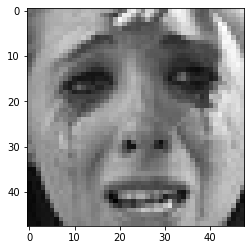

In [56]:
import matplotlib.pyplot as plt
plt.imshow(img.reshape(48,48),cmap='gray')